In [114]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [115]:
housing = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')
housing.shape

(20640, 10)

In [116]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


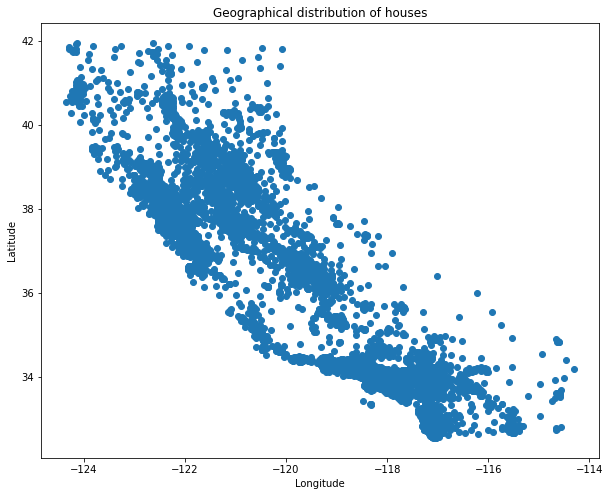

In [106]:
# EDA

housingc = housing.copy()

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.scatter(housingc.longitude, housingc.latitude)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical distribution of houses')
plt.show()

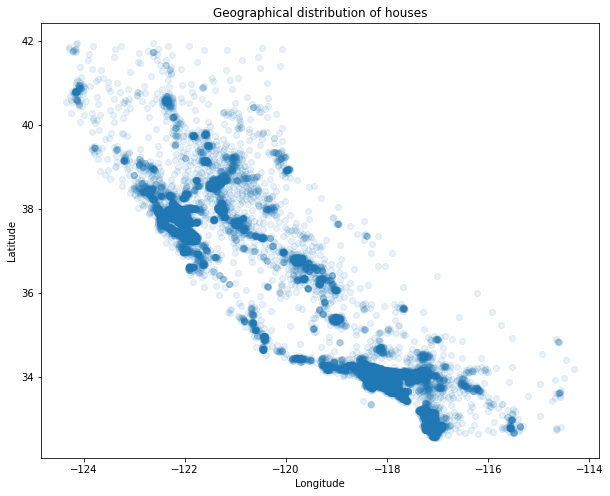

In [107]:
# take a look at the density of the points
plt.figure(figsize=(10,8))
plt.scatter(housingc.longitude, housingc.latitude, alpha=0.1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical distribution of houses')
plt.show()

In [108]:
correlation_matrix = housing.corr()
correlation_matrix.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [109]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [117]:
# Deal with missing values of the total_bedroom  (2 ways)

# from sklearn.impute import SimpleImputer

# housing.drop(columns=['ocean_proximity'], inplace=True)  # drop column with categorical values in order for the imputer to work
# imputer = SimpleImputer()
# housing_imputed = pd.DataFrame(imputer.fit_transform(housingc))
# housing_imputed.columns = housing.columns
# put back the ocean_proximity column
# pd.concat()
# housing_imputed.isnull().sum()

housing.total_bedrooms = housing.total_bedrooms.fillna(housing['total_bedrooms'].mean())
housing.total_bedrooms.isnull().sum()

0

In [111]:
housing.ocean_proximity.nunique()

5

In [118]:
# encode ocean_proximity

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

housing['ocean_proximity'] = encoder.fit_transform(housing['ocean_proximity'])

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [119]:
from sklearn.preprocessing import StandardScaler

features = list(housing.drop('median_house_value', axis=1))
X = StandardScaler().fit(housing[features]).transform(housing[features])
y = housing['median_house_value']

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [128]:
from sklearn.metrics import mean_absolute_error

print('MAE: ', mean_absolute_error(y_test, model.predict(X_test)))

MAE:  49822.93576359544


In [131]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=10)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [ ]:
print('MAE: ', mean_absolute_error(y_test, model.predict(X_test)))